In [79]:
import numpy as np
import pandas as pd
from pandas.api.types import is_object_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format

In [81]:
train=pd.read_csv('/home/ivan_pronin/IT/kaggle/house-prices-advanced-regression-techniques/train.csv')
# train=pd.read_csv('C:/Users/julal/IT/kaggle/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/home/ivan_pronin/IT/kaggle/house-prices-advanced-regression-techniques/test.csv')
# test=pd.read_csv('C:/Users/julal/IT/kaggle/house-prices-advanced-regression-techniques/test.csv')
data_description='/home/ivan_pronin/IT/kaggle/house-prices-advanced-regression-techniques/data_description.txt'

In [82]:
train=train.drop(columns=['Alley', 'PoolQC','Fence', 'MiscFeature','GarageArea', 'MSSubClass'])
test=test.drop(columns=['Alley', 'PoolQC','Fence', 'MiscFeature','GarageArea', 'MSSubClass'])

In [83]:
print(train.shape)
print(test.shape)

(1460, 75)
(1459, 74)


In [84]:
nonnumeric_features=[]
for col in train.columns:
    if is_object_dtype(train[col]):
        nonnumeric_features.append(col)

In [85]:
nonnumeric_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [86]:
# isinstance(dtype, CategoricalDtype)

In [87]:
train[nonnumeric_features].describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1460       1460       1460     1460       1460      1460   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            225       1260       1445     1220        726      1141   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1460        1460        1460        588      1460      1460   
unique        8          15          16          3         4         5   
top     CompShg     VinylSd     VinylSd    BrkFace        TA        TA   
freq       1434         515         504        445       906      1282   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1460     1423     1423         1422         1423         1422   
unique          6        4        4            4            6            6   
top         PConc       TA       TA           No          Unf          Unf   
freq          647      649     1311          953          430         1256   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1460      1460       1460       1459        1460       1460   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1428       741       1365       1334         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count          770       1379         1379       1379       1379       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq           380        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198

In [88]:
train.loc[:, ~train.columns.isin(nonnumeric_features)].describe()

Id  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
count 1460.00      1201.00   1460.00      1460.00      1460.00    1460.00   
mean   730.50        70.05  10516.83         6.10         5.58    1971.27   
std    421.61        24.28   9981.26         1.38         1.11      30.20   
min      1.00        21.00   1300.00         1.00         1.00    1872.00   
25%    365.75        59.00   7553.50         5.00         5.00    1954.00   
50%    730.50        69.00   9478.50         6.00         5.00    1973.00   
75%   1095.25        80.00  11601.50         7.00         6.00    2000.00   
max   1460.00       313.00 215245.00        10.00         9.00    2010.00   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count       1460.00     1452.00     1460.00     1460.00    1460.00   
mean        1984.87      103.69      443.64       46.55     567.24   
std           20.65      181.07      456.10      161.32     441.87   
min         1950.00        0.00        0.00        0.00       0.00   
25%         1967.00        0.00        0.00        0.00     223.00   
50%         1994.00        0.00      383.50        0.00     477.50   
75%         2004.00      166.00      712.25        0.00     808.00   
max         2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77       94.24   
std            1.63        0.64        24.69        0.75      125.34   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00        0.00   
50%            6.00        1.00      1980.00        2.00        0.00   
75%            7.00        1.00      2002.00        2.00      168.00   
max           14.00        3.00      2010.00        4.00      857.00   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count      1460.00        1460.00    1460.00      1460.00   1460.00  1460.00   
mean         46.66          21.95       3.41        15.06      2.76    43.49   
std          66.26          61.12      29.32        55.76     40.18   496.12   
min           0.00           0.00       0.00         0.00      0.00     0.00   
25%           0.00           0.00       0.00         0.00      0.00     0.00   
50%          25.00           0.00       0.00         0.00      0.00     0.00   
75%          68.00           0.00       0.00         0.00      0.00     0.00   
max         547.00         

In [89]:
train['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [90]:
with open(data_description, 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
#         if any(feature in line for feature in ['LotFrontage', 'MasVnrType', 'FireplaceQu']):
        if 'Utilities' in line:
            print(line)
            for j in range(i+1, min(i+10, len(lines))):
                print(lines[j])

Utilities: Type of utilities available

		

       AllPub	All public Utilities (E,G,W,& S)	

       NoSewr	Electricity, Gas, and Water (Septic Tank)

       NoSeWa	Electricity and Gas Only

       ELO	Electricity only	

	

LotConfig: Lot configuration



       Inside	Inside lot

       AllPub	All public Utilities (E,G,W,& S)	

       NoSewr	Electricity, Gas, and Water (Septic Tank)

       NoSeWa	Electricity and Gas Only

       ELO	Electricity only	

	

LotConfig: Lot configuration



       Inside	Inside lot

       Corner	Corner lot

       CulDSac	Cul-de-sac



In [91]:
nonnumeric_features.extend([
                            'Id',
                            'BsmtFullBath',
                            ])

In [92]:
train[nonnumeric_features]=train[nonnumeric_features].astype('category')
test[nonnumeric_features]=test[nonnumeric_features].astype('category')

In [93]:
numeric_features=[]
for col in train.columns:
    if is_numeric_dtype(train[col]):
        numeric_features.append(col)
    else:
        pass
print(numeric_features)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [94]:
zero_data_set_sum_train=train.isnull().sum()
zero_data_set_percentage_train=train.isnull().sum()/train.shape[0]*100
zero_data_set_train=pd.DataFrame({'sum':zero_data_set_sum_train, 'percentage': zero_data_set_percentage_train})
zero=zero_data_set_train.loc[zero_data_set_train['sum']>0]

In [95]:
zero

sum  percentage
LotFrontage   259       17.74
MasVnrType    872       59.73
MasVnrArea      8        0.55
BsmtQual       37        2.53
BsmtCond       37        2.53
BsmtExposure   38        2.60
BsmtFinType1   37        2.53
BsmtFinType2   38        2.60
Electrical      1        0.07
FireplaceQu   690       47.26
GarageType     81        5.55
GarageYrBlt    81        5.55
GarageFinish   81        5.55
GarageQual     81        5.55
GarageCond     81        5.55

In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=-999)
imputer2= SimpleImputer(strategy='constant', fill_value=-999)
imputer3= SimpleImputer(strategy='most_frequent')

In [97]:
column_to_impute_train=[]
for i in range(len(zero.index)):
    column_to_impute_train.append(zero.index[i])
for col in column_to_impute_train:
    if col in numeric_features:
        imputed_column = imputer.fit_transform(train[[col]])
        train[[col]] = imputed_column
    else:
        imputed_column = imputer2.fit_transform(train[[col]])
        train[[col]] = imputed_column

In [98]:
zero_data_set_sum_test=test.isnull().sum()
zero_data_set_percentage_test=test.isnull().sum()/test.shape[0]*100
zero_data_set_test=pd.DataFrame({'sum':zero_data_set_sum_test, 'percentage': zero_data_set_percentage_test})
zero2=zero_data_set_test.loc[zero_data_set_test['sum']>0]
zero2

sum  percentage
MSZoning        4        0.27
LotFrontage   227       15.56
Utilities       2        0.14
Exterior1st     1        0.07
Exterior2nd     1        0.07
MasVnrType    894       61.27
MasVnrArea     15        1.03
BsmtQual       44        3.02
BsmtCond       45        3.08
BsmtExposure   44        3.02
BsmtFinType1   42        2.88
BsmtFinSF1      1        0.07
BsmtFinType2   42        2.88
BsmtFinSF2      1        0.07
BsmtUnfSF       1        0.07
TotalBsmtSF     1        0.07
BsmtFullBath    2        0.14
BsmtHalfBath    2        0.14
KitchenQual     1        0.07
Functional      2        0.14
FireplaceQu   730       50.03
GarageType     76        5.21
GarageYrBlt    78        5.35
GarageFinish   78        5.35
GarageCars      1        0.07
GarageQual     78        5.35
GarageCond     78        5.35
SaleType        1        0.07

In [99]:
column_to_impute_test_as_train=[]
column_to_impute_test_only=[]
for i in range(len(zero2.index)):
    if zero2.index[i] in zero.index:
        column_to_impute_test_as_train.append(zero2.index[i])
    else:
        column_to_impute_test_only.append(zero2.index[i])
for col in column_to_impute_test_as_train:
    if col in numeric_features:
        imputed_column = imputer.fit_transform(test[[col]])
        test[[col]] = imputed_column
    else:
        imputed_column = imputer2.fit_transform(test[[col]])
        test[[col]] = imputed_column
for col in column_to_impute_test_only:
    if col in numeric_features:
        imputed_column = imputer.fit_transform(test[[col]])
        test[[col]] = imputed_column
    else:
        imputed_column = imputer3.fit_transform(test[[col]])
        test[[col]] = imputed_column

In [100]:
test['BsmtFullBath']=test['BsmtFullBath'].astype(int)

In [101]:
train['allSF']=train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF']
test['allSF']=test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF']
train.drop(columns=['TotalBsmtSF'], inplace=True)
test.drop(columns=['TotalBsmtSF'], inplace=True)

In [102]:
numeric_features.append('allSF')
numeric_features.remove('TotalBsmtSF')
# numeric_features.remove('1stFlrSF')
# numeric_features.remove('2ndFlrSF')

In [103]:
# data_list=['Neighborhood', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'ExterQual', 'GarageType', 'CentralAir', 'BsmtExposure']
# for col in data_list:
#     train[col]=train[col].astype(str)
# fig,ax=pl.subplots(1,8, figsize=(30,10))
# count=0
# for col in data_list:
#     ax[count].hist(train[col])
#     ax[count].set_xlabel(col)
#     count+=1
# plt.show()

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fir

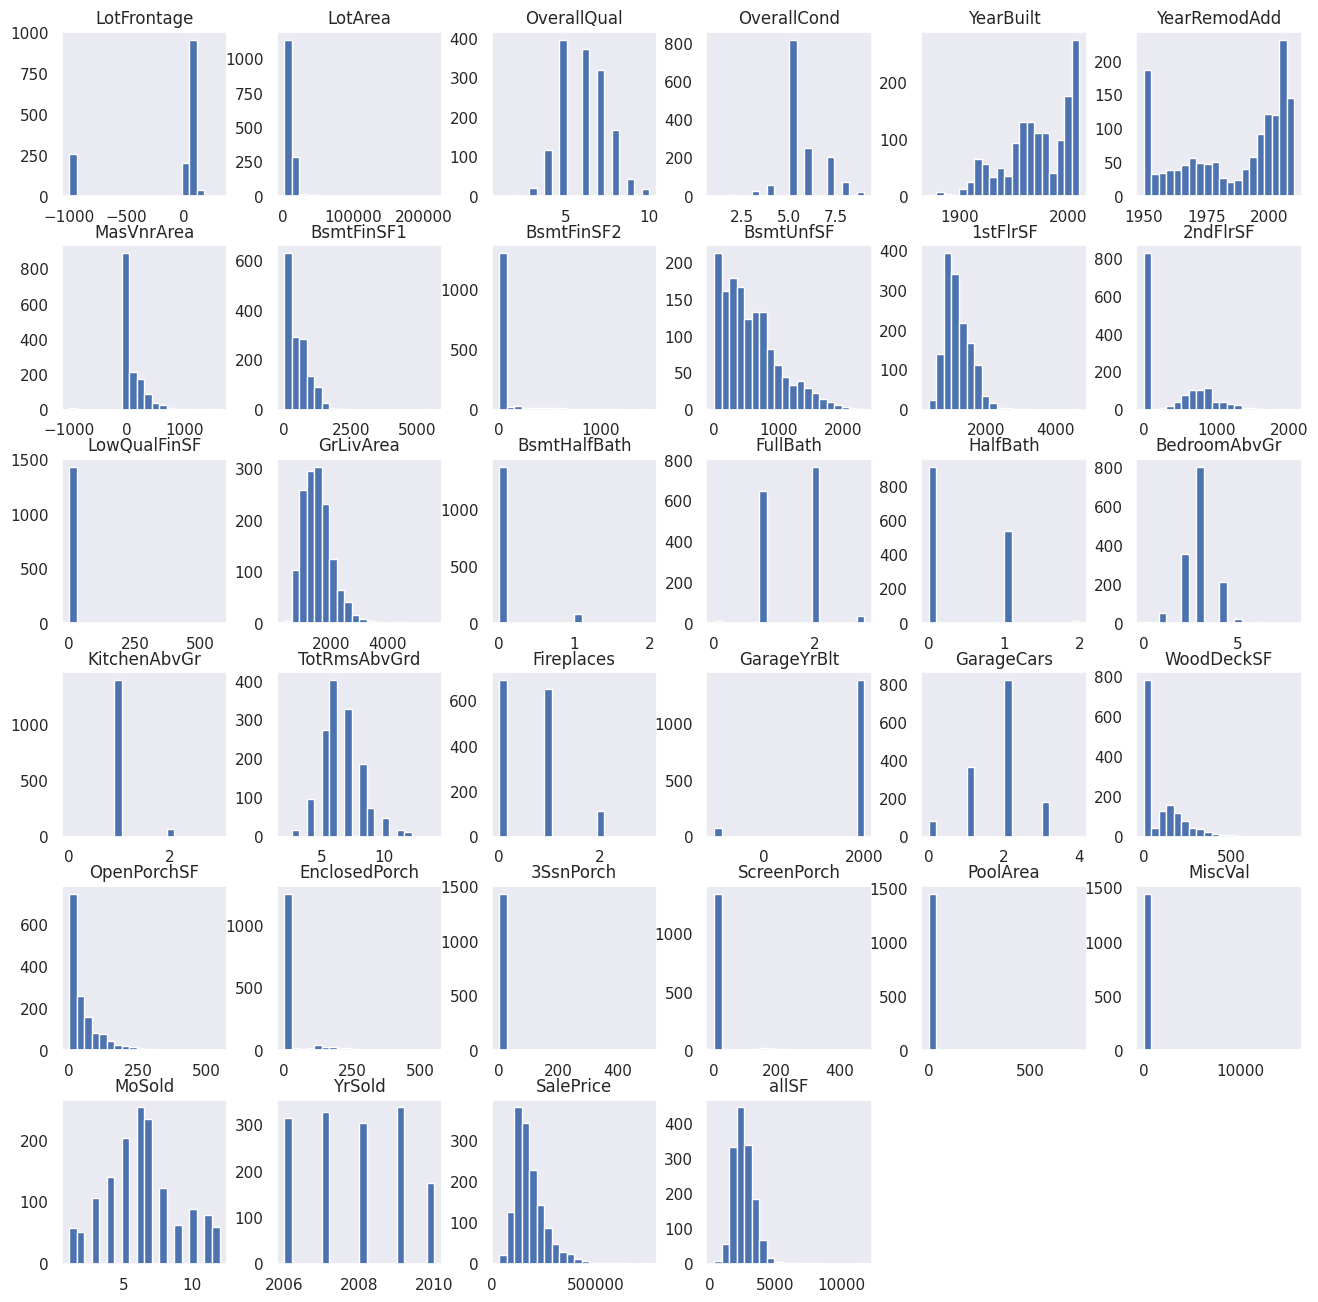

In [104]:
train.hist(figsize=(16,16), bins=20, grid=False)

In [105]:
train[numeric_features].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'allSF'],
      dtype='object')

In [106]:
train.loc[train['PoolArea']>0, 'PoolArea']=1
test.loc[test['PoolArea']>0, 'PoolArea']=1
# train.loc[train['LowQualFinSF']>0, 'LowQualFinSF']=1
# test.loc[test['LowQualFinSF']>0, 'LowQualFinSF']=1

In [107]:
# for col in numeric_features:
#     print(train[col].value_counts())

In [108]:
train[numeric_features].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'allSF'],
      dtype='object')

In [109]:
with open(data_description, 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
#         if any(feature in line for feature in ['LotFrontage', 'MasVnrType', 'FireplaceQu']):
        if 'YearBuilt' in line:
            print(line)
            for j in range(i+1, min(i+10, len(lines))):
                print(lines[j])

YearBuilt: Original construction date



YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)



RoofStyle: Type of roof



       Flat	Flat

       Gable	Gable

       Gambrel	Gabrel (Barn)

       Hip	Hip



In [110]:
train[nonnumeric_features]

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       -999        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       -999        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       -999        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       -999        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       -999        TA        TA   
1459  CompShg     HdBoard     HdBoard       -999        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

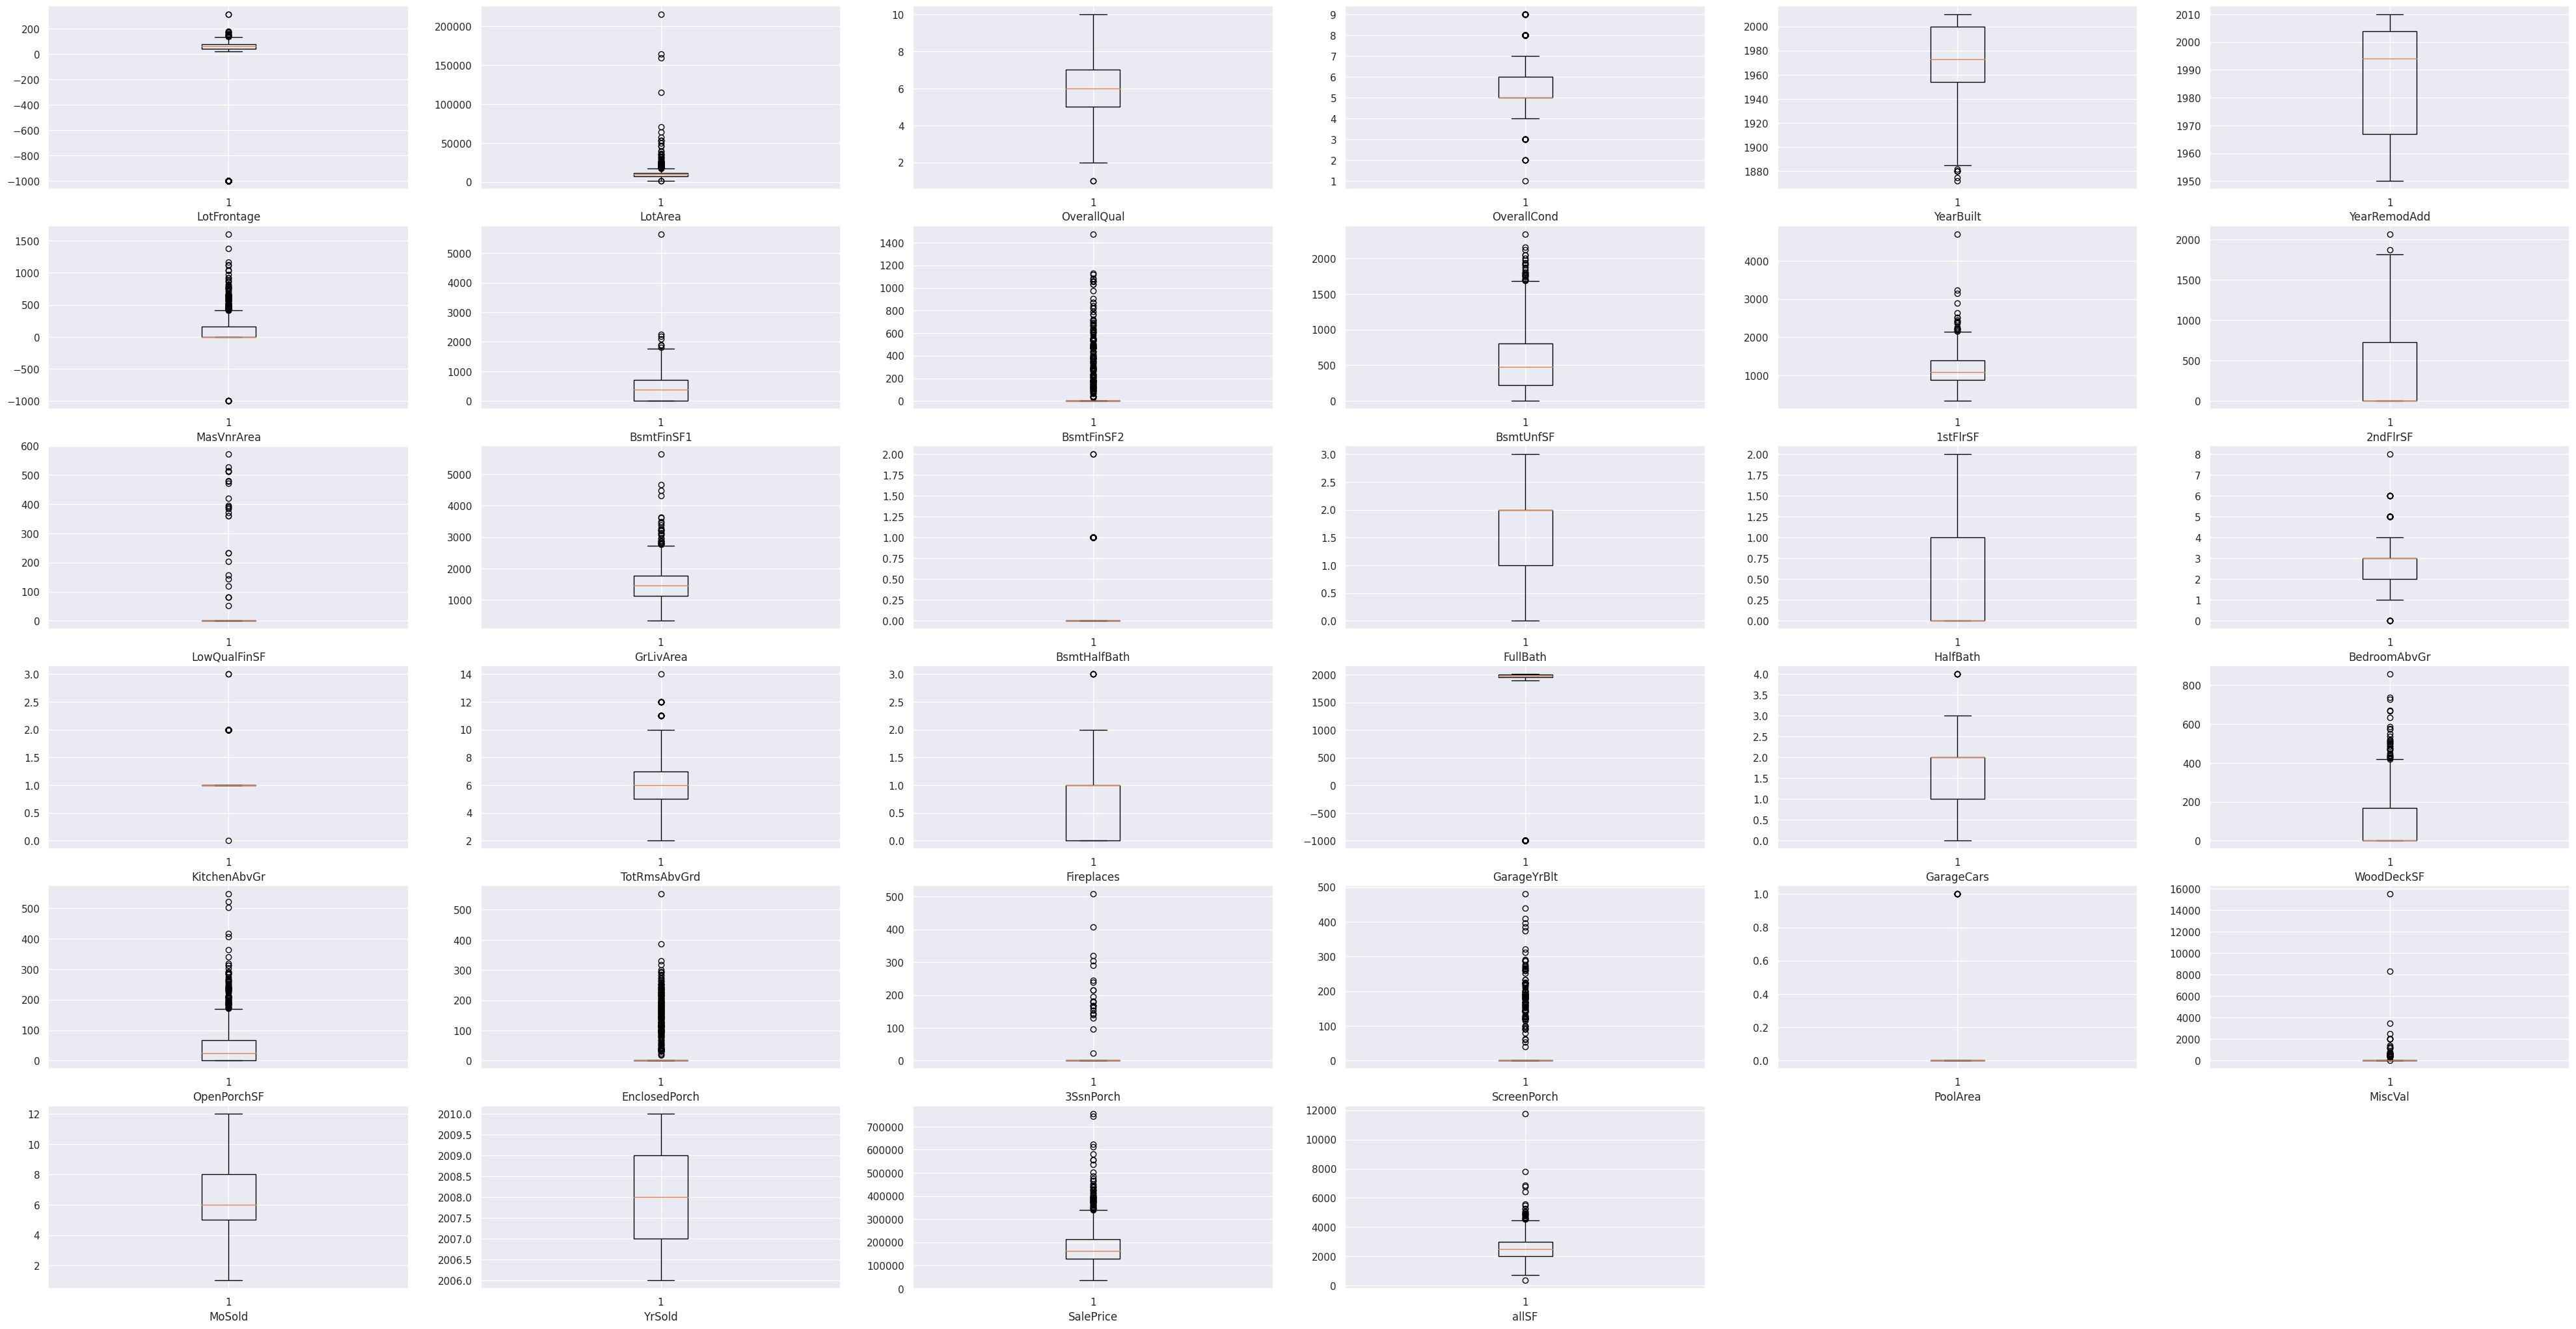

In [111]:
gs = gridspec.GridSpec(7, 6)
plt.figure(figsize=(50,30))

column=0
for i in range(7):
    column_curr=column
    for z in range(6):
        if column_curr <len(numeric_features):
            ax = plt.subplot(gs[i, z])
            ax.boxplot(train[train[numeric_features].columns[column_curr]])
            ax.set_xlabel(train[numeric_features].columns[column_curr])
            column_curr+=1
            column=column_curr
column+=7

plt.show()

In [112]:
smoth_columns=[
               'LotArea',
            #    'ScreenPorch'
               ]

In [113]:
for col in smoth_columns:
    q1 = np.percentile(train[col], 25)
    q3 = np.percentile(train[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    train.loc[(train[col] > upper_bound) | (train[col] < lower_bound), col] = np.nan
    train[col].interpolate(method='polynomial', order=5, inplace=True)

In [114]:
for col in smoth_columns:
    q1 = np.percentile(test[col], 25)
    q3 = np.percentile(test[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    test.loc[(test[col] > upper_bound) | (test[col] < lower_bound), col] = np.nan
    test[col].interpolate(method='polynomial', order=5, inplace=True)

In [115]:
train[numeric_features].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'allSF'],
      dtype='object')

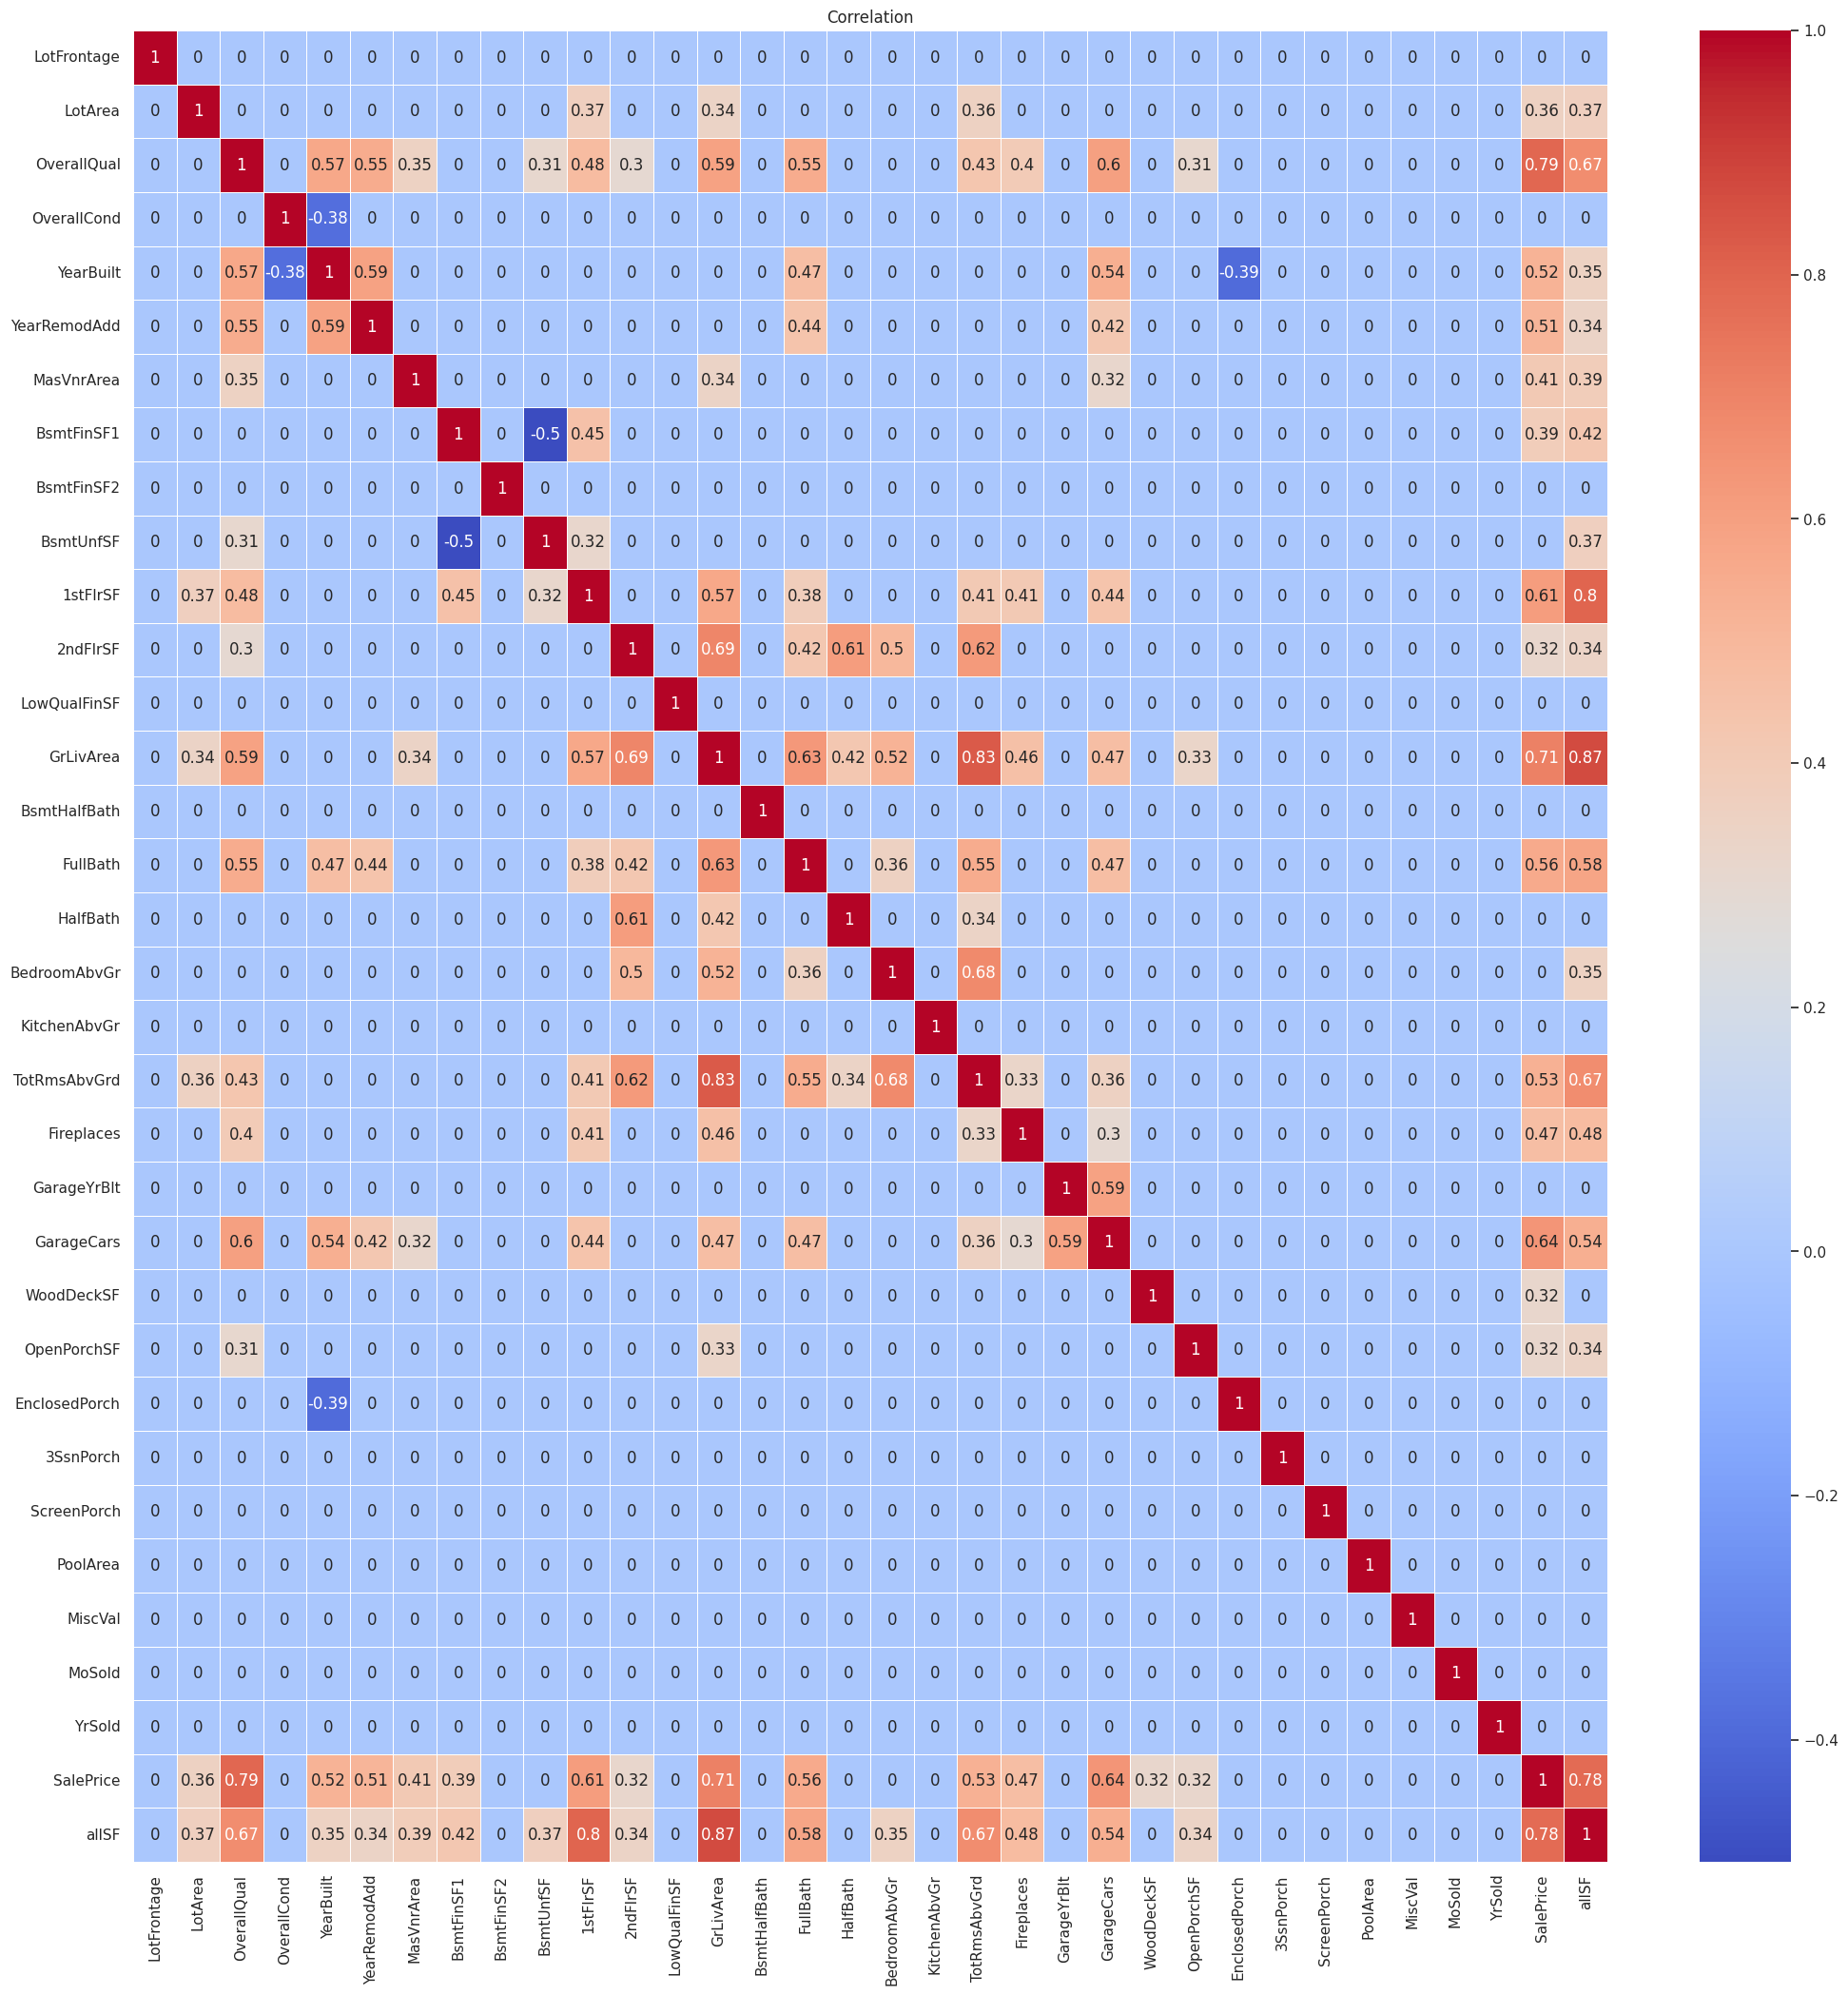

In [116]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=train[numeric_features].corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.3]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [117]:
y=train['SalePrice'].to_numpy()
train.drop(columns=['SalePrice'], inplace=True)

In [118]:
numeric_features.remove('SalePrice')

In [119]:
for col in numeric_features:
    train[col]=train[col].astype(str)
    test[col]=test[col].astype(str)

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2)

In [121]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 74), (1168,), (292, 74), (292,))

In [122]:
import catboost as cb
train_dataset = cb.Pool(train,y,
                        cat_features=nonnumeric_features
)                                                     
# test_dataset = cb.Pool(x_test,y_test,          
#                        cat_features=nonnumeric_features)

In [123]:
CAT=cb.CatBoostRegressor(metric_period=100,
                        #  eval_metric='RMSE',
                         task_type='GPU',
                         iterations=1000, 
                         learning_rate=0.04,
                        #  early_stopping_rounds = 50,
                         depth=8,
                         
                         
                        )
history=CAT.fit(train_dataset,
        # eval_set=test_dataset
)

0:	learn: 77329.4904646	total: 68.1ms	remaining: 1m 8s
100:	learn: 24299.8688130	total: 9.09s	remaining: 1m 20s
200:	learn: 20244.2674239	total: 17.9s	remaining: 1m 11s
300:	learn: 18291.2820267	total: 26.6s	remaining: 1m 1s
400:	learn: 17236.9419911	total: 35.2s	remaining: 52.6s
500:	learn: 16749.3008777	total: 43.1s	remaining: 43s
600:	learn: 16290.6091728	total: 52.1s	remaining: 34.6s
700:	learn: 15740.6652889	total: 1m	remaining: 25.7s
800:	learn: 15262.2070456	total: 1m 8s	remaining: 17s
900:	learn: 14874.8529970	total: 1m 17s	remaining: 8.5s
999:	learn: 14512.0137983	total: 1m 25s	remaining: 0us


In [124]:
feature_importance = CAT.get_feature_importance(train_dataset)
feature_names = train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_importance_df

Feature  Importance
73          allSF       38.10
15    OverallQual       14.50
10   Neighborhood        5.44
43      GrLivArea        4.26
50    KitchenQual        3.64
32     BsmtFinSF1        2.59
18   YearRemodAdd        2.49
54    FireplaceQu        2.37
17      YearBuilt        2.28
28       BsmtQual        1.96
58     GarageCars        1.94
30   BsmtExposure        1.25
40       1stFlrSF        1.14
41       2ndFlrSF        1.06
57   GarageFinish        1.03
46       FullBath        0.99
2     LotFrontage        0.97
38     CentralAir        0.93
16    OverallCond        0.88
25      ExterQual        0.87
3         LotArea        0.74
37      HeatingQC        0.66
56    GarageYrBlt        0.65
53     Fireplaces        0.55
1        MSZoning        0.53
51   TotRmsAbvGrd        0.50
11     Condition1        0.45
44   BsmtFullBath        0.41
72  SaleCondition        0.39
59     GarageQual        0.39
13       BldgType        0.38
6     LandContour        0.38
63    OpenPorchSF        0.37
55     GarageType        0.32
31   BsmtFinType1        0.32
27     Foundation        0.28
48   BedroomAbvGr        0.28
66    ScreenPorch        0.25
20       RoofMatl        0.24
29       BsmtCond        0.23
14     HouseStyle        0.22
35      BsmtUnfSF        0.22
52     Functional        0.19
5        LotShape        0.19
8       LotConfig        0.18
23     MasVnrType        0.16
71       SaleType        0.16
60     GarageCond        0.14
9       LandSlope        0.14
12     Condition2        0.13
26      ExterCond        0.13
62     WoodDeckSF        0.12
22    Exterior2nd        0.12
39     Electrical        0.11
69         MoSold        0.09
36        Heating        0.08
24     MasVnrArea        0.08
33   BsmtFinType2        0.07
67       PoolArea        0.07
61     PavedDrive        0.06
64  EnclosedPorch        0.06
49   KitchenAbvGr        0.05
21    Exterior1st        0.05
19      RoofStyle        0.03
47       HalfBath        0.03
4          Street        0.02
68        MiscVal        0.02
34     BsmtFinSF2        0.02
42   LowQualFinSF        0.02
65      3SsnPorch        0.01
7       Utilities        0.01
45   BsmtHalfBath        0.00
70         YrSold        0.00
0              Id        0.00

In [133]:
y_pred_cat_train=CAT.predict(train)
y_pred_cat_test=CAT.predict(test)

In [126]:
# numeric_features.append('Y_pred')

In [127]:
nonnumeric_features.remove('Id')
nonnumeric_features.remove('BsmtFullBath')

In [128]:
train2 = train.copy()
test2 = test.copy()
y2 = y.copy()

In [129]:
train2['Y_pred']=y_pred_cat_train
test2['Y_pred']=y_pred_cat_test

In [130]:
train2.drop(columns=['Id'], inplace=True)
test2.drop(columns=['Id'], inplace=True)

In [131]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [132]:
def change(x):
      if x==-999:
            return 'not_filled'
      else:
            return x

for feature in nonnumeric_features:
      train2[feature]=train2[feature].apply(change)
      test2[feature]=test2[feature].apply(change)

In [134]:
gs = gridspec.GridSpec(7, 6)
plt.figure(figsize=(50,30))

column=0
for i in range(7):
    column_curr=column
    for z in range(6):
        if column_curr <len(nonnumeric_features):
            ax = plt.subplot(gs[i, z])
            sns.violinplot(data=train2[nonnumeric_features], x=train2[nonnumeric_features].columns[column_curr], y=y2)
            ax.set_xlabel(train2[nonnumeric_features].columns[column_curr])
            column_curr+=1
            column=column_curr
column+=7

plt.show()

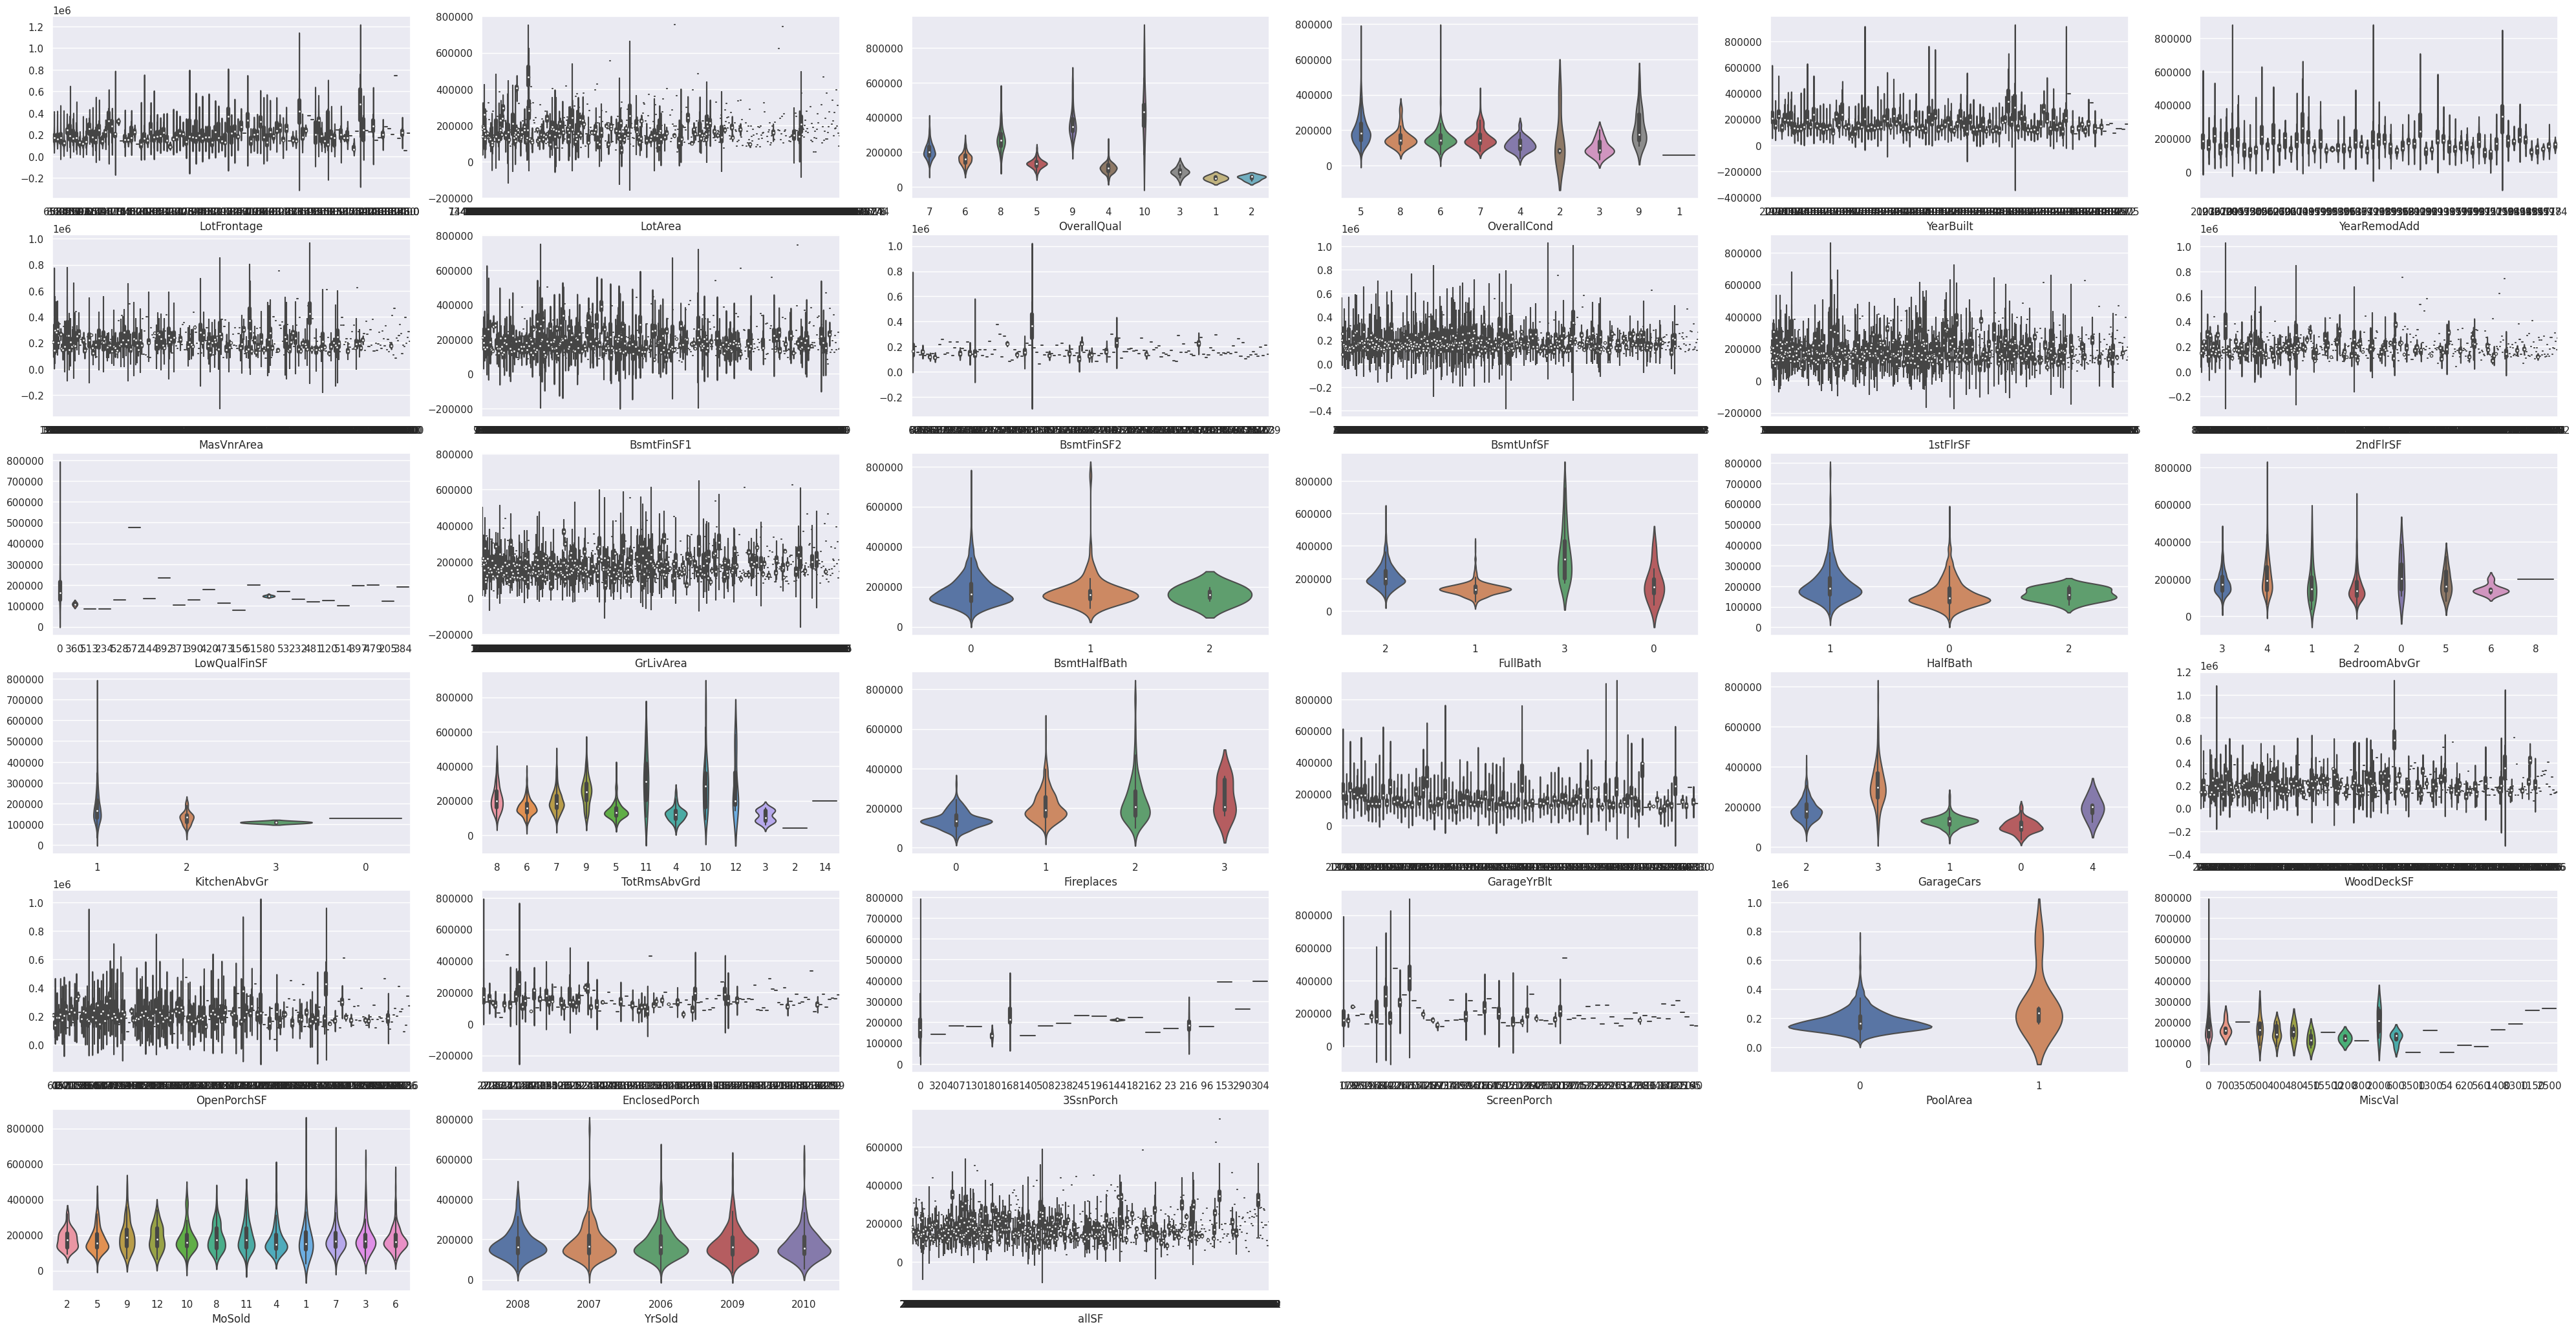

In [135]:
gs = gridspec.GridSpec(7, 6)
plt.figure(figsize=(50,30))

column=0
for i in range(7):
    column_curr=column
    for z in range(6):
        if column_curr <len(numeric_features):
            ax = plt.subplot(gs[i, z])
            sns.violinplot(data=train2[numeric_features], x=train2[numeric_features].columns[column_curr], y=y2)
            ax.set_xlabel(train2[numeric_features].columns[column_curr])
            column_curr+=1
            column=column_curr
column+=7

plt.show()

In [2115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in nonnumeric_features:
        train2[feature] = le.fit_transform(train2[feature])
        test2[feature] = le.transform(test2[feature])

In [2116]:
train2=train2.astype(float)
test2=test2.astype(float)

In [2090]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(train2, y2, test_size=0.2, random_state=2)

In [2091]:
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((1168, 75), (1168,), (292, 75), (292,))

In [2092]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2093]:
# clf = xgb.XGBClassifier(seed=42, subsample=0.9)
# cv_results = cross_val_score(clf,x_train , y_train,cv=kfold , scoring='accuracy')
# y_pred = cross_val_predict(clf,x_test,y_test,cv=10)
# proba = cross_val_predict(clf,x_test,y_test,cv=10, method='predict_proba')
# clf.fit(x_train , y_train , verbose=0, eval_set =[(x_test, y_test)])

In [2095]:
from xgboost import XGBRegressor
XG=XGBRegressor(
    booster = 'gbtree',
    learning_rate = 0.02,
    colsample_bylevel = 0.5,
    colsample_bytree = 0.5,
    max_depth = 10,
    n_estimators = 10000,
    eval_metric = 'rmse',
    early_stopping_rounds = 50,
    tree_method = 'gpu_hist')

XG.fit(train2, y2,
       eval_set = [(x_train2, y_train2), (x_test2, y_test2)], 
       verbose = 100)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [2096]:
importances = XG.get_booster().get_score(importance_type='weight')
importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

In [2097]:
importances

[('LotArea', 15087.0),
 ('LotFrontage', 12558.0),
 ('BsmtUnfSF', 8644.0),
 ('Y_pred', 7916.0),
 ('YearBuilt', 7651.0),
 ('GrLivArea', 7548.0),
 ('Neighborhood', 7352.0),
 ('1stFlrSF', 7345.0),
 ('YearRemodAdd', 7060.0),
 ('BsmtFinSF1', 7058.0),
 ('allSF', 6255.0),
 ('GarageYrBlt', 5386.0),
 ('MoSold', 5195.0),
 ('MasVnrArea', 5193.0),
 ('OpenPorchSF', 4931.0),
 ('YearsAfterRemod', 4713.0),
 ('WoodDeckSF', 4210.0),
 ('OverallQual', 4166.0),
 ('OverallCond', 3857.0),
 ('Exterior1st', 3677.0),
 ('2ndFlrSF', 3534.0),
 ('LotShape', 3374.0),
 ('YrSold', 3229.0),
 ('HouseStyle', 3163.0),
 ('LotConfig', 3127.0),
 ('Exterior2nd', 3119.0),
 ('BsmtFinType1', 3114.0),
 ('TotRmsAbvGrd', 2835.0),
 ('MSZoning', 2627.0),
 ('BsmtExposure', 2484.0),
 ('Condition1', 2133.0),
 ('MasVnrType', 1793.0),
 ('HeatingQC', 1727.0),
 ('LandContour', 1681.0),
 ('BedroomAbvGr', 1658.0),
 ('RoofStyle', 1653.0),
 ('FireplaceQu', 1622.0),
 ('GarageFinish', 1602.0),
 ('BldgType', 1495.0),
 ('SaleCondition', 1335.0),
 ('

In [2098]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler2 = StandardScaler()
# scaler3 = StandardScaler()
# # scaler = MinMaxScaler()

# train2= scaler.fit_transform(train2).astype(float)
# test2 = scaler2.fit_transform(test2).astype(float)
# y2 = scaler3.fit_transform(y2.reshape(-1, 1))

In [2099]:
# x_train2 = X_train.copy()
# x_test2 = X_test.copy()
# y_train2=Y_train.copy()
# y_test2=Y_test.copy()
# x_train2 = train2.copy()
# x_test2 = test2.copy()
# y_train2=y2.copy()

In [2100]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping

# MLP = Sequential([
#         Dense(5, input_shape=(x_train2.shape[1],)),
#         Dense(1)
#     ])

# # MLP.summary()

# MLP.compile(optimizer='adam', loss='mse')

In [2101]:
# early_stopping = EarlyStopping(monitor='loss', patience=50)
# history=MLP.fit(x_train2,y_train2, 
#                 epochs=140, 
                # validation_data=(x_test2, y_test2), 
                # callbacks=[early_stopping],
                # verbose=False
                # )

In [2102]:
# y_pred_mlp_train=MLP.predict(x_train2)
# y_pred_mlp_test=MLP.predict(x_test2)

In [2103]:
# from sklearn.metrics import mean_squared_error
# mse_test_mlp=mean_squared_error(y_test2, y_pred_mlp_test)
# mse_train_mlp=history.history["loss"][-1]
# quantity_of_epochs = history.epoch[-1] + 1

# print(f'MSE on test is {mse_test_mlp:.05f}')
# print(f'MSE on train is {mse_train_mlp:.05f}')
# print(f'The best result stopped on {quantity_of_epochs}')
# print(f'MSE on test_data is more/less train_data by {(mse_test_mlp/mse_train_mlp-1):.03f}')

In [2104]:
# y_pred_test2=scaler3.inverse_transform(y_pred_mlp_test.reshape(-1, 1))
# y_test_after=scaler3.inverse_transform(y_test2.reshape(-1, 1))

In [2105]:
# print(f'rmse after first launch of MLP is {np.sqrt(np.sum((np.squeeze(y_test_after)-np.squeeze(y_pred_test2))**2)/len(y_pred_test2))}')

In [2106]:
# print(f'rmse before MLP cycle is {np.sqrt(np.sum((np.squeeze(y_test_after)-np.squeeze(y_pred_test2))**2)/len(y_pred_test2))}')
# result_train = np.hstack((x_train2, y_pred_mlp_train))
# result_test = np.hstack((x_test2, y_pred_mlp_test))
# x_train2 = result_train
# x_test2 = result_test

# n=5
# for i in range(1, n+1):
#     if i<=4:
#         MLP = Sequential([
#             Dense(i*2, input_shape=(x_train2.shape[1],)),
            # Dropout(0.5),
    #         Dense(1)
    #     ])
    #     MLP.compile(optimizer='sgd', loss='mse')
    # else:
    #     MLP = Sequential([
    #         Dense(i, input_shape=(x_train2.shape[1],)),
    #         Dense(1)
    #     ])
    #     MLP.compile(optimizer='adam', loss='mse')
    # early_stopping = EarlyStopping(monitor='loss', patience=50)
    # history = MLP.fit(x_train2, y_train2,
    #                   epochs=200,
                    #   validation_data=(x_test2, y_test2),
                    #   callbacks=[early_stopping],
                    #   verbose=False
                    #   )
    # y_pred_mlp_train = MLP.predict(x_train2)
    # y_pred_mlp_test = MLP.predict(x_test2)
    # quantity_of_epochs = history.epoch[-1] + 1
    # mse_test_mlp=mean_squared_error(y_test2, y_pred_mlp_test)
    # mse_train_mlp=history.history["loss"][-1]
    # print(f'The best result stopped on {quantity_of_epochs}')
    # print(f'MSE on last test is {mse_test_mlp:.05f}')
    # print(f'MSE on last train is {mse_train_mlp:.05f}')
    # print(f'MSE on last test_data is more/less last train_data by {(mse_test_mlp/mse_train_mlp-1):.03f}')
    # y_pred_test3 = scaler3.inverse_transform(y_pred_mlp_test.reshape(-1, 1))
    # print(f'rmse after {i} MLP cycle is {np.sqrt(np.sum((np.squeeze(y_test_after)-np.squeeze(y_pred_test3))**2)/len(y_pred_test3))}')
    # result_train = np.hstack((x_train2, y_pred_mlp_train))
    # result_test = np.hstack((x_test2, y_pred_mlp_test))
    # x_train2 = result_train
    # x_test2 = result_test
    # i+=1

In [2107]:
# predictions=np.squeeze(y_pred_test3)

In [2108]:
# predictions=CAT.predict(test)
# predictions

In [2109]:
# predictions=XG.predict(test2)
# predictions

array([113568.88 , 160398.88 , 185722.78 , ..., 155754.77 , 113871.016,
       223195.4  ], dtype=float32)

In [2110]:
# output = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})
# output.to_csv('my_answer15.csv', index=False)